raw datasets
* source: https://drive.google.com/file/d/1dkVp9dPN-qKgJblTaxhwGAuWHP2HuqTG/view?usp=drive_link
* target: https://drive.google.com/file/d/10oRJ57tEAFjyhPrI1kG7IlG_IjmJQQwL/view?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
s = pd.read_csv('source_raw.csv')
t = pd.read_csv('target_raw.csv')

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36894 entries, 0 to 36893
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       36894 non-null  int64  
 1   varId            36894 non-null  object 
 2   alt              36894 non-null  object 
 3   ancestry         36894 non-null  object 
 4   beta             36894 non-null  float64
 5   chromosome       36894 non-null  object 
 6   dataset          36894 non-null  object 
 7   eaf              34894 non-null  float64
 8   maf              34894 non-null  float64
 9   multiAllelic     36894 non-null  bool   
 10  n                36894 non-null  int64  
 11  pValue           36894 non-null  float64
 12  phenotype        36894 non-null  object 
 13  position         36894 non-null  int64  
 14  reference        36894 non-null  object 
 15  stdErr           36894 non-null  float64
 16  unscaled_beta    36894 non-null  float64
 17  unscaled_std

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   varId            10000 non-null  object 
 2   alt              10000 non-null  object 
 3   ancestry         10000 non-null  object 
 4   beta             10000 non-null  float64
 5   chromosome       10000 non-null  object 
 6   dataset          10000 non-null  object 
 7   eaf              9601 non-null   float64
 8   maf              9601 non-null   float64
 9   multiAllelic     10000 non-null  bool   
 10  n                10000 non-null  float64
 11  pValue           10000 non-null  float64
 12  phenotype        10000 non-null  object 
 13  position         10000 non-null  int64  
 14  reference        10000 non-null  object 
 15  stdErr           10000 non-null  float64
 16  unscaled_beta    10000 non-null  float64
 17  unscaled_stdE

##source cleaning

dropping less available data column

In [ ]:
col = ['oddsRatio']
s.drop(col, axis=1, inplace=True)

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36894 entries, 0 to 36893
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       36894 non-null  int64  
 1   varId            36894 non-null  object 
 2   alt              36894 non-null  object 
 3   ancestry         36894 non-null  object 
 4   beta             36894 non-null  float64
 5   chromosome       36894 non-null  object 
 6   dataset          36894 non-null  object 
 7   eaf              34894 non-null  float64
 8   maf              34894 non-null  float64
 9   multiAllelic     36894 non-null  bool   
 10  n                36894 non-null  int64  
 11  pValue           36894 non-null  float64
 12  phenotype        36894 non-null  object 
 13  position         36894 non-null  int64  
 14  reference        36894 non-null  object 
 15  stdErr           36894 non-null  float64
 16  unscaled_beta    36894 non-null  float64
 17  unscaled_std

dropping null value instances

In [ ]:
s = s.dropna()

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30715 entries, 0 to 36892
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30715 non-null  int64  
 1   varId            30715 non-null  object 
 2   alt              30715 non-null  object 
 3   ancestry         30715 non-null  object 
 4   beta             30715 non-null  float64
 5   chromosome       30715 non-null  object 
 6   dataset          30715 non-null  object 
 7   eaf              30715 non-null  float64
 8   maf              30715 non-null  float64
 9   multiAllelic     30715 non-null  bool   
 10  n                30715 non-null  int64  
 11  pValue           30715 non-null  float64
 12  phenotype        30715 non-null  object 
 13  position         30715 non-null  int64  
 14  reference        30715 non-null  object 
 15  stdErr           30715 non-null  float64
 16  unscaled_beta    30715 non-null  float64
 17  unscaled_stdErr  

In [ ]:
s.head()

,Unnamed: 0,varId,alt,ancestry,beta,chromosome,dataset,eaf,maf,multiAllelic,...,position,reference,stdErr,unscaled_beta,unscaled_stdErr,zScore,consequence,dbSNP,minorAllele,nearest
0,0,12:99326756:T:G,G,EU,0.20847,12,GWAS_FUSION_eu,0.818773,0.181227,False,...,99326756,T,0.044504,0.20847,0.044504,4.684298,intron_variant,rs621284,T,"[""ANKS1B""]"
1,1,13:108227879:A:G,G,EU,0.16144,13,GWAS_FUSION_eu,0.395911,0.395911,False,...,108227879,A,0.035517,0.16144,0.035517,4.545429,intron_variant,rs9301233,G,"[""FAM155A""]"
2,2,12:99321471:A:G,G,EU,-0.16410,12,GWAS_FUSION_eu,0.319393,0.319393,False,...,99321471,A,0.037596,-0.16410,0.037596,-4.364826,intron_variant,rs201380,G,"[""ANKS1B""]"
3,3,2:85738944:C:T,T,EU,0.18319,2,GWAS_FUSION_eu,0.215747,0.215747,False,...,85738944,C,0.042367,0.18319,0.042367,4.323884,regulatory_region_variant,rs2044475,T,"[""MAT2A""]"
4,4,18:34803165:A:G,G,EU,0.19737,18,GWAS_FUSION_eu,0.174115,0.174115,False,...,34803165,A,0.045921,0.19737,0.045921,4.298034,3_prime_UTR_variant,rs3747899,G,"[""CELF4""]"


dropping irrelevant/redundant data columns

In [ ]:
cols = ['Unnamed: 0', 'varId', 'ancestry', 'dataset', 'multiAllelic', 'n', 'phenotype', 'unscaled_beta', 'unscaled_stdErr', 'consequence', 'dbSNP', 'nearest']
s.drop(cols, axis=1, inplace=True)

<ipython-input-10-9414e3812305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.drop(cols, axis=1, inplace=True)


In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30715 entries, 0 to 36892
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt          30715 non-null  object 
 1   beta         30715 non-null  float64
 2   chromosome   30715 non-null  object 
 3   eaf          30715 non-null  float64
 4   maf          30715 non-null  float64
 5   pValue       30715 non-null  float64
 6   position     30715 non-null  int64  
 7   reference    30715 non-null  object 
 8   stdErr       30715 non-null  float64
 9   zScore       30715 non-null  float64
 10  minorAllele  30715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.8+ MB


correlation matrix for non-encoded numeric columns

In [ ]:
numeric = ['beta', 'eaf', 'maf', 'pValue', 'position', 'stdErr', 'zScore']
s_numeric = s[numeric]
s_numeric.head()


,beta,eaf,maf,pValue,position,stdErr,zScore
0,0.20847,0.818773,0.181227,0.000003,99326756,0.044504,4.684298
1,0.16144,0.395911,0.395911,0.000006,108227879,0.035517,4.545429
2,-0.16410,0.319393,0.319393,0.000014,99321471,0.037596,-4.364826
3,0.18319,0.215747,0.215747,0.000016,85738944,0.042367,4.323884
4,0.19737,0.174115,0.174115,0.000018,34803165,0.045921,4.298034


In [ ]:
s_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30715 entries, 0 to 36892
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beta      30715 non-null  float64
 1   eaf       30715 non-null  float64
 2   maf       30715 non-null  float64
 3   pValue    30715 non-null  float64
 4   position  30715 non-null  int64  
 5   stdErr    30715 non-null  float64
 6   zScore    30715 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.9 MB


heatmap of numeric genetic data

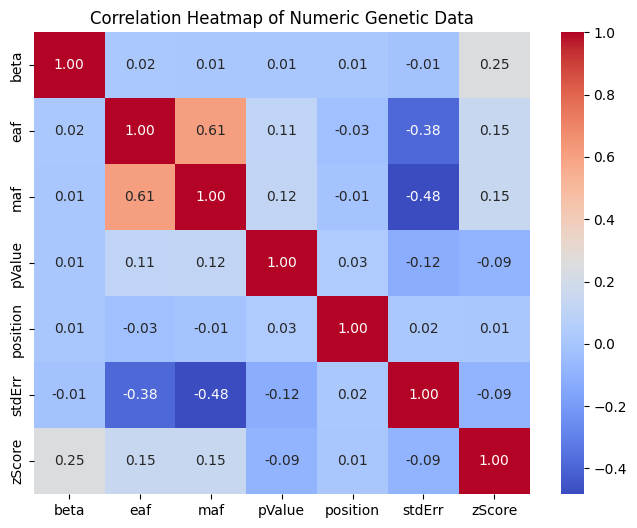

In [ ]:

correlation_matrix = s_numeric.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Genetic Data')
plt.show()

dropping redundant data

In [ ]:
cols = ['chromosome', 'reference']
s.drop(cols, axis=1, inplace=True)

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30715 entries, 0 to 36892
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt          30715 non-null  object 
 1   beta         30715 non-null  float64
 2   eaf          30715 non-null  float64
 3   maf          30715 non-null  float64
 4   pValue       30715 non-null  float64
 5   position     30715 non-null  int64  
 6   stdErr       30715 non-null  float64
 7   zScore       30715 non-null  float64
 8   minorAllele  30715 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.3+ MB


1 hot encoding alternative alleles and minor alleles

In [ ]:
encodings = ['alt', 'minorAllele']
s = pd.get_dummies(s, columns=encodings, drop_first=True)

In [ ]:
c = ['alt_C', 'alt_G', 'alt_T', 'minorAllele_C', 'minorAllele_G', 'minorAllele_T']
s[c] = s[c].astype(int)

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30715 entries, 0 to 36892
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           30715 non-null  float64
 1   eaf            30715 non-null  float64
 2   maf            30715 non-null  float64
 3   pValue         30715 non-null  float64
 4   position       30715 non-null  int64  
 5   stdErr         30715 non-null  float64
 6   zScore         30715 non-null  float64
 7   alt_C          30715 non-null  int64  
 8   alt_G          30715 non-null  int64  
 9   alt_T          30715 non-null  int64  
 10  minorAllele_C  30715 non-null  int64  
 11  minorAllele_G  30715 non-null  int64  
 12  minorAllele_T  30715 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.3 MB


In [ ]:
s.head()

,beta,eaf,maf,pValue,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T
0,0.20847,0.818773,0.181227,0.000003,99326756,0.044504,4.684298,0,1,0,0,0,1
1,0.16144,0.395911,0.395911,0.000006,108227879,0.035517,4.545429,0,1,0,0,1,0
2,-0.16410,0.319393,0.319393,0.000014,99321471,0.037596,-4.364826,0,1,0,0,1,0
3,0.18319,0.215747,0.215747,0.000016,85738944,0.042367,4.323884,0,0,1,0,0,1
4,0.19737,0.174115,0.174115,0.000018,34803165,0.045921,4.298034,0,1,0,0,1,0


taking log of p values to remove scaling ambiguity

In [ ]:
s["logP"] = -np.log10(s["pValue"])

In [ ]:
s.drop("pValue", axis=1, inplace=True)

In [ ]:
s.head()

,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP
0,0.20847,0.818773,0.181227,99326756,0.044504,4.684298,0,1,0,0,0,1,5.516256
1,0.16144,0.395911,0.395911,108227879,0.035517,4.545429,0,1,0,0,1,0,5.229774
2,-0.16410,0.319393,0.319393,99321471,0.037596,-4.364826,0,1,0,0,1,0,4.868413
3,0.18319,0.215747,0.215747,85738944,0.042367,4.323884,0,0,1,0,0,1,4.788612
4,0.19737,0.174115,0.174115,34803165,0.045921,4.298034,0,1,0,0,1,0,4.738404


calculating Polygenic Risk Score (PRS) under the condtion of Hardy Weinberg Equilibrium
* prs = estimated genotype (effective allele frequency) x effect size (influence of the snp)

In [ ]:
s["prs_component"] = s["eaf"] * s["beta"]

In [ ]:
s.head()

,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component
0,0.20847,0.818773,0.181227,99326756,0.044504,4.684298,0,1,0,0,0,1,5.516256,0.170690
1,0.16144,0.395911,0.395911,108227879,0.035517,4.545429,0,1,0,0,1,0,5.229774,0.063916
2,-0.16410,0.319393,0.319393,99321471,0.037596,-4.364826,0,1,0,0,1,0,4.868413,-0.052412
3,0.18319,0.215747,0.215747,85738944,0.042367,4.323884,0,0,1,0,0,1,4.788612,0.039523
4,0.19737,0.174115,0.174115,34803165,0.045921,4.298034,0,1,0,0,1,0,4.738404,0.034365


In [ ]:
s.to_csv('source_processed.csv')

##target cleaning

dropping less available data column

In [ ]:
col = ['oddsRatio']
t.drop(col, axis=1, inplace=True)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   varId            10000 non-null  object 
 2   alt              10000 non-null  object 
 3   ancestry         10000 non-null  object 
 4   beta             10000 non-null  float64
 5   chromosome       10000 non-null  object 
 6   dataset          10000 non-null  object 
 7   eaf              9601 non-null   float64
 8   maf              9601 non-null   float64
 9   multiAllelic     10000 non-null  bool   
 10  n                10000 non-null  float64
 11  pValue           10000 non-null  float64
 12  phenotype        10000 non-null  object 
 13  position         10000 non-null  int64  
 14  reference        10000 non-null  object 
 15  stdErr           10000 non-null  float64
 16  unscaled_beta    10000 non-null  float64
 17  unscaled_stdE

dropping null value instances

In [ ]:
t = t.dropna()

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9463 non-null   int64  
 1   varId            9463 non-null   object 
 2   alt              9463 non-null   object 
 3   ancestry         9463 non-null   object 
 4   beta             9463 non-null   float64
 5   chromosome       9463 non-null   object 
 6   dataset          9463 non-null   object 
 7   eaf              9463 non-null   float64
 8   maf              9463 non-null   float64
 9   multiAllelic     9463 non-null   bool   
 10  n                9463 non-null   float64
 11  pValue           9463 non-null   float64
 12  phenotype        9463 non-null   object 
 13  position         9463 non-null   int64  
 14  reference        9463 non-null   object 
 15  stdErr           9463 non-null   float64
 16  unscaled_beta    9463 non-null   float64
 17  unscaled_stdErr  94

In [ ]:
t.head()

,Unnamed: 0,varId,alt,ancestry,beta,chromosome,dataset,eaf,maf,multiAllelic,...,position,reference,stdErr,unscaled_beta,unscaled_stdErr,zScore,consequence,dbSNP,minorAllele,nearest
0,0,16:53809123:C:T,T,SA,0.090776,16,Huang2021_Cardiometabolic_SA,0.335173,0.335173,False,...,53809123,C,0.011315,0.090776,0.011315,8.022463,intron_variant,rs55872725,T,"[""FTO""]"
1,1,16:53806453:A:G,G,SA,0.091561,16,Huang2021_Cardiometabolic_SA,0.329811,0.329811,False,...,53806453,A,0.011452,0.091561,0.011452,7.995198,intron_variant,rs56094641,G,"[""FTO""]"
2,2,16:53802494:C:T,T,SA,0.091423,16,Huang2021_Cardiometabolic_SA,0.330586,0.330586,False,...,53802494,C,0.011453,0.091423,0.011453,7.982772,intron_variant,rs11642015,T,"[""FTO""]"
3,3,16:53803223:G:A,A,SA,0.091423,16,Huang2021_Cardiometabolic_SA,0.330586,0.330586,False,...,53803223,G,0.011453,0.091423,0.011453,7.982772,intron_variant,rs62048402,A,"[""FTO""]"
4,4,16:53803574:T:A,A,SA,0.091423,16,Huang2021_Cardiometabolic_SA,0.330586,0.330586,False,...,53803574,T,0.011453,0.091423,0.011453,7.982772,intron_variant,rs1558902,A,"[""FTO""]"


dropping irrelevant/redundant data columns

In [ ]:
cols = ['Unnamed: 0', 'varId', 'ancestry', 'dataset', 'multiAllelic', 'n', 'phenotype', 'unscaled_beta', 'unscaled_stdErr', 'consequence', 'dbSNP', 'nearest']
t.drop(cols, axis=1, inplace=True)

<ipython-input-32-f17457bbc301>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.drop(cols, axis=1, inplace=True)


In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt          9463 non-null   object 
 1   beta         9463 non-null   float64
 2   chromosome   9463 non-null   object 
 3   eaf          9463 non-null   float64
 4   maf          9463 non-null   float64
 5   pValue       9463 non-null   float64
 6   position     9463 non-null   int64  
 7   reference    9463 non-null   object 
 8   stdErr       9463 non-null   float64
 9   zScore       9463 non-null   float64
 10  minorAllele  9463 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 887.2+ KB


In [ ]:
numeric = ['beta', 'eaf', 'maf', 'pValue', 'position', 'stdErr', 'zScore']
t_numeric = t[numeric]
t_numeric.head()

,beta,eaf,maf,pValue,position,stdErr,zScore
0,0.090776,0.335173,0.335173,1.036459e-15,53809123,0.011315,8.022463
1,0.091561,0.329811,0.329811,1.293661e-15,53806453,0.011452,7.995198
2,0.091423,0.330586,0.330586,1.430829e-15,53802494,0.011453,7.982772
3,0.091423,0.330586,0.330586,1.430829e-15,53803223,0.011453,7.982772
4,0.091423,0.330586,0.330586,1.430829e-15,53803574,0.011453,7.982772


In [ ]:
t_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beta      9463 non-null   float64
 1   eaf       9463 non-null   float64
 2   maf       9463 non-null   float64
 3   pValue    9463 non-null   float64
 4   position  9463 non-null   int64  
 5   stdErr    9463 non-null   float64
 6   zScore    9463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 591.4 KB


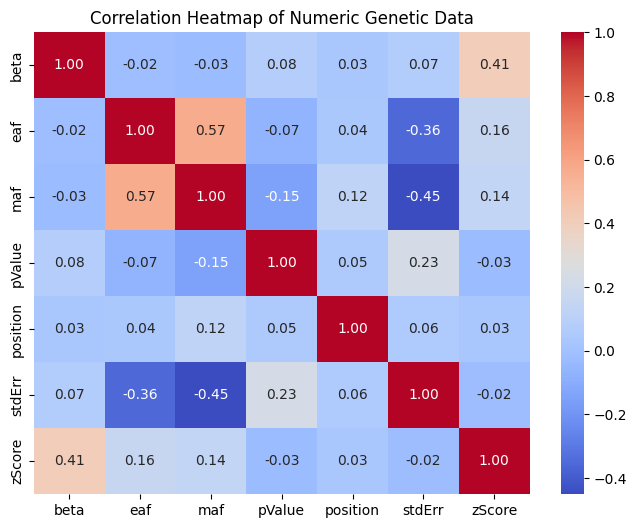

In [ ]:

correlation_matrix = t_numeric.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Genetic Data')
plt.show()

dropping redundant data

In [ ]:
cols = ['chromosome', 'reference']
t.drop(cols, axis=1, inplace=True)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt          9463 non-null   object 
 1   beta         9463 non-null   float64
 2   eaf          9463 non-null   float64
 3   maf          9463 non-null   float64
 4   pValue       9463 non-null   float64
 5   position     9463 non-null   int64  
 6   stdErr       9463 non-null   float64
 7   zScore       9463 non-null   float64
 8   minorAllele  9463 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 739.3+ KB


1 hot encoding reference alleles and minor alleles

In [ ]:
encodings = ['alt', 'minorAllele']
t = pd.get_dummies(t, columns=encodings, drop_first=True)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beta                      9463 non-null   float64
 1   eaf                       9463 non-null   float64
 2   maf                       9463 non-null   float64
 3   pValue                    9463 non-null   float64
 4   position                  9463 non-null   int64  
 5   stdErr                    9463 non-null   float64
 6   zScore                    9463 non-null   float64
 7   alt_AAGAAGAAAGGG          9463 non-null   bool   
 8   alt_ACCTG                 9463 non-null   bool   
 9   alt_AG                    9463 non-null   bool   
 10  alt_AT                    9463 non-null   bool   
 11  alt_ATTC                  9463 non-null   bool   
 12  alt_C                     9463 non-null   bool   
 13  alt_CA                    9463 non-null   bool   
 14  alt_CAA      

In [ ]:
# eliminating sparse encoded variations

In [ ]:
keep = ['beta', 'eaf', 'maf', 'pValue', 'position', 'stdErr', 'zScore', 'alt_C', 'alt_G', 'alt_T', 'minorAllele_C', 'minorAllele_G', 'minorAllele_T']
t = t[keep]

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   pValue         9463 non-null   float64
 4   position       9463 non-null   int64  
 5   stdErr         9463 non-null   float64
 6   zScore         9463 non-null   float64
 7   alt_C          9463 non-null   bool   
 8   alt_G          9463 non-null   bool   
 9   alt_T          9463 non-null   bool   
 10  minorAllele_C  9463 non-null   bool   
 11  minorAllele_G  9463 non-null   bool   
 12  minorAllele_T  9463 non-null   bool   
dtypes: bool(6), float64(6), int64(1)
memory usage: 646.9 KB


In [ ]:
c = ['alt_C', 'alt_G', 'alt_T', 'minorAllele_C', 'minorAllele_G', 'minorAllele_T']
t[c] = t[c].astype(int)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   pValue         9463 non-null   float64
 4   position       9463 non-null   int64  
 5   stdErr         9463 non-null   float64
 6   zScore         9463 non-null   float64
 7   alt_C          9463 non-null   int64  
 8   alt_G          9463 non-null   int64  
 9   alt_T          9463 non-null   int64  
 10  minorAllele_C  9463 non-null   int64  
 11  minorAllele_G  9463 non-null   int64  
 12  minorAllele_T  9463 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


In [ ]:
t.head()

,beta,eaf,maf,pValue,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T
0,0.090776,0.335173,0.335173,1.036459e-15,53809123,0.011315,8.022463,0,0,1,0,0,1
1,0.091561,0.329811,0.329811,1.293661e-15,53806453,0.011452,7.995198,0,1,0,0,1,0
2,0.091423,0.330586,0.330586,1.430829e-15,53802494,0.011453,7.982772,0,0,1,0,0,1
3,0.091423,0.330586,0.330586,1.430829e-15,53803223,0.011453,7.982772,0,0,0,0,0,0
4,0.091423,0.330586,0.330586,1.430829e-15,53803574,0.011453,7.982772,0,0,0,0,0,0


taking log of p values to remove scaling ambiguity

In [ ]:
t["logP"] = -np.log10(t["pValue"])

In [ ]:
t.drop("pValue", axis=1, inplace=True)

In [ ]:
t.head()

,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP
0,0.090776,0.335173,0.335173,53809123,0.011315,8.022463,0,0,1,0,0,1,14.984448
1,0.091561,0.329811,0.329811,53806453,0.011452,7.995198,0,1,0,0,1,0,14.888179
2,0.091423,0.330586,0.330586,53802494,0.011453,7.982772,0,0,1,0,0,1,14.844412
3,0.091423,0.330586,0.330586,53803223,0.011453,7.982772,0,0,0,0,0,0,14.844412
4,0.091423,0.330586,0.330586,53803574,0.011453,7.982772,0,0,0,0,0,0,14.844412


calculating Polygenic Risk Score (PRS) under the condtion of Hardy Weinberg Equilibrium
* prs = estimated genotype (effective allele frequency) x effect size (influence of the snp)

In [ ]:
t["prs_component"] = t["eaf"] * t["beta"]

In [ ]:
t.head()

,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component
0,0.090776,0.335173,0.335173,53809123,0.011315,8.022463,0,0,1,0,0,1,14.984448,0.030426
1,0.091561,0.329811,0.329811,53806453,0.011452,7.995198,0,1,0,0,1,0,14.888179,0.030198
2,0.091423,0.330586,0.330586,53802494,0.011453,7.982772,0,0,1,0,0,1,14.844412,0.030223
3,0.091423,0.330586,0.330586,53803223,0.011453,7.982772,0,0,0,0,0,0,14.844412,0.030223
4,0.091423,0.330586,0.330586,53803574,0.011453,7.982772,0,0,0,0,0,0,14.844412,0.030223


In [ ]:
t.to_csv('target_processed.csv')